## Summary

----

In [129]:
from pathlib import Path

In [130]:
p = Path('.')

In [133]:
Path(p)

PosixPath('.')

In [1]:
import concurrent.futures
import tempfile
import urllib.request
import os

os.environ["OMP_NUM_THREADS"] = "1"

import mdtraj


# Download demo PDB file (works with any PDB file AFAIK)
with tempfile.NamedTemporaryFile(suffix=".pdb.gz") as pdb_file:
    with open(pdb_file.name, "wb") as fout:
        fout.write(urllib.request.urlopen("https://files.rcsb.org/download/4DKL.pdb.gz").read())
    traj = mdtraj.load(pdb_file.name)


# Calculations work in the current REPL
sasa = mdtraj.shrake_rupley(traj, mode="residue")


# Calculations deadlock when using `concurrent.futures.ProcessPoolExecutor`
with concurrent.futures.ProcessPoolExecutor() as pool:
    futures = pool.map(mdtraj.shrake_rupley, [traj, traj])
    retults = list(futures)

In [19]:
import numpy as np

In [27]:
residue = traj.top.residue(0)

In [29]:
residue.segment_id

''

In [20]:
traj2 = traj.atom_slice([atom.index for atom in traj.top.atoms if atom.residue.name == "GLY"])

In [30]:
import io

In [39]:
df, bonds = traj2.top.to_dataframe()

In [41]:
df

,serial,name,element,resSeq,resName,chainID,segmentID
0,120,N,N,82,GLY,0,
1,121,CA,C,82,GLY,0,
2,122,C,C,82,GLY,0,
3,123,O,O,82,GLY,0,
4,143,N,N,85,GLY,0,
...,...,...,...,...,...,...,...
71,2408,O,O,1113,GLY,0,
72,2762,N,N,1156,GLY,0,
73,2763,CA,C,1156,GLY,0,
74,2764,C,C,1156,GLY,0,


In [44]:
df["chainID"] = 2

In [45]:
df

,serial,name,element,resSeq,resName,chainID,segmentID
0,120,N,N,82,GLY,2,
1,121,CA,C,82,GLY,2,
2,122,C,C,82,GLY,2,
3,123,O,O,82,GLY,2,
4,143,N,N,85,GLY,2,
...,...,...,...,...,...,...,...
71,2408,O,O,1113,GLY,2,
72,2762,N,N,1156,GLY,2,
73,2763,CA,C,1156,GLY,2,
74,2764,C,C,1156,GLY,2,


In [48]:
from scipy import stats

In [101]:
M = 9000  # Total number of objects
n = 265  # Total number of type 1 objects
N = 300  # Number of draws without replacement

x = 
stats.hypergeom(M, n, N).pmf(1)

0.0010308022246744647

In [46]:
traj2.top = mdtraj.Topology.from_dataframe(df, bonds)

In [47]:
import tempfile

with tempfile.NamedTemporaryFile(suffix=".pdb") as tmp:
    traj2.save(tmp.name)
    !cat {tmp.name}

REMARK   1 CREATED WITH MDTraj 1.9.3, 2020-04-03
CRYST1   70.882  174.730   68.353  90.00 107.84  90.00 P 1           1 
MODEL        0
ATOM      1  N   GLY A  82     -23.842   1.337 -25.622  1.00  0.00          N   
ATOM      2  CA  GLY A  82     -23.297   1.294 -24.275  1.00  0.00          C   
ATOM      3  C   GLY A  82     -21.798   1.523 -24.262  1.00  0.00          C   
ATOM      4  O   GLY A  82     -21.302   2.406 -23.554  1.00  0.00          O   
ATOM      5  N   GLY A  85     -20.985   5.111 -25.736  1.00  0.00          N   
ATOM      6  CA  GLY A  85     -21.330   6.115 -24.748  1.00  0.00          C   
ATOM      7  C   GLY A  85     -20.398   6.170 -23.552  1.00  0.00          C   
ATOM      8  O   GLY A  85     -19.920   7.245 -23.187  1.00  0.00          O   
ATOM      9  N   GLY A 131     -25.550 -22.693 -27.273  1.00  0.00          N   
ATOM     10  CA  GLY A 131     -25.965 -23.642 -26.257  1.00  0.00          C   
ATOM     11  C   GLY A 131     -24.762 -24.187 -25.513

In [38]:
traj2.top.to_dataframe()[0]

,serial,name,element,resSeq,resName,chainID,segmentID
0,120,N,N,82,GLY,0,
1,121,CA,C,82,GLY,0,
2,122,C,C,82,GLY,0,
3,123,O,O,82,GLY,0,
4,143,N,N,85,GLY,0,
...,...,...,...,...,...,...,...
71,2408,O,O,1113,GLY,0,
72,2762,N,N,1156,GLY,0,
73,2763,CA,C,1156,GLY,0,
74,2764,C,C,1156,GLY,0,


In [25]:
traj.top.to_dataframe()[0]

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,N,N,65,MET,0,
1,2,CA,C,65,MET,0,
2,3,C,C,65,MET,0,
3,4,O,O,65,MET,0,
4,5,CB,C,65,MET,0,
...,...,...,...,...,...,...,...
3685,3687,O,O,733,HOH,1,
3686,3688,O,O,734,HOH,1,
3687,3689,O,O,735,HOH,1,
3688,3690,O,O,736,HOH,1,


In [9]:
[atom.index for atom in traj.top.ats if atom.residue.name == "GLY"]

[119,
 120,
 121,
 122,
 142,
 143,
 144,
 145,
 508,
 509,
 510,
 511,
 551,
 552,
 553,
 554,
 1050,
 1051,
 1052,
 1053,
 1163,
 1164,
 1165,
 1166,
 1493,
 1494,
 1495,
 1496,
 1659,
 1660,
 1661,
 1662,
 1746,
 1747,
 1748,
 1749,
 1782,
 1783,
 1784,
 1785,
 1794,
 1795,
 1796,
 1797,
 1939,
 1940,
 1941,
 1942,
 1977,
 1978,
 1979,
 1980,
 2139,
 2140,
 2141,
 2142,
 2372,
 2373,
 2374,
 2375,
 2388,
 2389,
 2390,
 2391,
 2404,
 2405,
 2406,
 2407,
 2761,
 2762,
 2763,
 2764,
 3251,
 3252,
 3253,
 3254]

## Imports

In [23]:
import concurrent.futures
import gzip
import importlib
import io
import logging
import os
import pickle
import shlex
import shutil
import socket
import subprocess
import sys
import tempfile
import time
import traceback
import warnings
from functools import partial
from itertools import islice
from pathlib import Path

import numpy as np
import pandas as pd
import yaml
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import mdtraj
import psutil
import pyarrow as pa
import pyarrow.parquet as pq
import tenacity
import torch
from kmbio import PDB
from kmtools import structure_tools
from scipy import stats

In [24]:
%matplotlib inline

pd.set_option("max_columns", 100)

In [25]:
SRC_PATH = Path.cwd().joinpath('..', 'src').resolve(strict=True)

if SRC_PATH.as_posix() not in sys.path:
    sys.path.insert(0, SRC_PATH.as_posix())

import helper
importlib.reload(helper)

<module 'helper' from '/home/kimlab1/strokach/workspace/adjacency-net-v2/src/helper/__init__.py'>

In [37]:
df = pd.DataFrame([[1,2,"c"]])

In [38]:
type(df.iloc[0])

pandas.core.series.Series

In [39]:
df.iloc[0].to_numpy()

array([1, 2, 'c'], dtype=object)

## Parameters

In [4]:
NOTEBOOK_PATH = Path(os.getenv("CI_JOB_NAME", "01_process_pdb_cbeta"))

NOTEBOOK_PATH

PosixPath('01_process_pdb_cbeta')

In [5]:
OUTPUT_PATH = Path(os.getenv('OUTPUT_DIR', NOTEBOOK_PATH.name)).resolve()
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

OUTPUT_PATH

PosixPath('/home/kimlab1/strokach/workspace/adjacency-net-v2/notebooks/01_process_pdb_cbeta')

In [8]:
TASK_ID = os.getenv("SLURM_ARRAY_TASK_ID")
TASK_COUNT = os.getenv("ORIGINAL_ARRAY_TASK_COUNT") or os.getenv("SLURM_ARRAY_TASK_COUNT")

TASK_ID = int(TASK_ID) if TASK_ID is not None else None
TASK_COUNT = int(TASK_COUNT) if TASK_COUNT is not None else None

TASK_ID, TASK_COUNT

(None, None)

In [9]:
DEBUG = TASK_ID is None

if DEBUG:
    TASK_ID = 87
    TASK_COUNT = 300
else:
    assert TASK_ID is not None
    assert TASK_COUNT is not None

TASK_ID, TASK_COUNT

(87, 300)

In [10]:
ADJACENCY_NET_DATA_PATH = (
    Path(os.getenv("DATAPKG_OUTPUT_DIR")).joinpath("adjacency-net-v2", "v0.4").resolve(strict=True)
)

ADJACENCY_NET_DATA_PATH

PosixPath('/home/kimlab1/database_data/datapkg_output_dir/adjacency-net-v2/v0.4')

In [11]:
PDB_DATA_PATH = (
    Path(os.environ["DATAPKG_OUTPUT_DIR"]).joinpath("pdb-ffindex", "2020-01-16", "arrow").resolve(strict=True)
)

PDB_DATA_PATH

PosixPath('/home/kimlab1/database_data/datapkg_output_dir/pdb-ffindex/2020-01-16/arrow')

In [12]:
if DEBUG:
    %load_ext autoreload
    %autoreload 2

## Load data

In [13]:
with PDB_DATA_PATH.joinpath("pdb-list.pickle").open("rb") as fin:
    pdb_list = pickle.load(fin)
    
pdb_data_reader = pa.RecordBatchFileReader(PDB_DATA_PATH.joinpath("pdb-mmcif.arrow"))

assert len(pdb_list) == pdb_data_reader.num_record_batches

In [14]:
pdb_list[:3]

['100d', '101d', '101m']

In [15]:
chunk_size = int(np.ceil(len(pdb_list) / TASK_COUNT))
task_idx = TASK_ID - 1
pdb_chunk = pdb_list[task_idx * chunk_size : (task_idx + 1) * chunk_size]
pdb_chunk_idxs = list(range(task_idx * chunk_size, (task_idx + 1) * chunk_size))[:len(pdb_chunk)]
assert all(pdb_chunk[i] == pdb_list[j] for i, j in enumerate(pdb_chunk_idxs))

chunk_size, task_idx, len(pdb_chunk), pdb_chunk[:3]

(532, 86, 532, ['2nbf', '2nbg', '2nbh'])

In [16]:
if DEBUG:
    pdb_chunk = pdb_chunk[:10]
    pdb_chunk_idxs = pdb_chunk_idxs[:10]

## Validate results

In [17]:
result_files = list(ADJACENCY_NET_DATA_PATH.joinpath("pdb-cbeta-stats").glob("*.torch"))

print(result_files)

[PosixPath('/home/kimlab1/database_data/datapkg_output_dir/adjacency-net-v2/v0.4/pdb-cbeta-stats/pdb-cbeta-stats-87-300.torch')]


In [22]:
data = []
for result_file in result_files:
    print(result_file)
    with result_file.open("rb") as fin:
        while True:
            try:
                row = torch.load(fin)
            except EOFError:
                break
            else:
                data.append(row)
    print(len(data))

/home/kimlab1/database_data/datapkg_output_dir/adjacency-net-v2/v0.4/pdb-cbeta-stats/pdb-cbeta-stats-87-300.torch
10


In [19]:
cb_residues = np.vstack([row[2] for row in data if row[2] is not None and row[3] is not None])
cb_vectors = np.vstack([row[3] for row in data if row[2] is not None and row[3] is not None])

In [20]:
cb_vectors_ala = cb_vectors[cb_residues.reshape(-1) == "ALA", :]

0.93431388215536 0.01339330409167214
-1.200662615319008 0.010846992689943035
-0.029789939244484052 0.005660098726460094


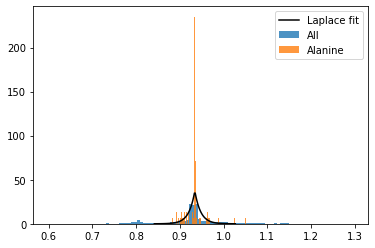

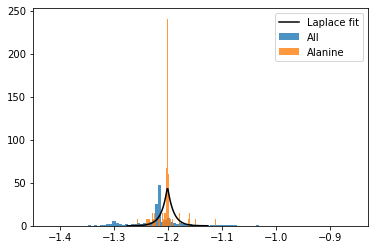

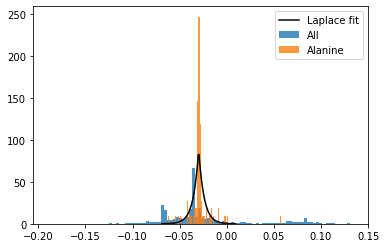

In [21]:
for i, xlim in [(0, (0.6, 1.3)), (1, (-1.5, -0.8)), (2, (-0.35, 0.45))]:
    fg, ax = plt.subplots()
    ax.hist(np.clip(cb_vectors[:, i], *xlim), bins=100, density=True, alpha=0.8, label="All")
    ax.hist(
        np.clip(cb_vectors_ala[:, i], *xlim), bins=100, density=True, alpha=0.8, label="Alanine"
    )

    #     median = np.percentile(cb_vectors[:, i], np.array([50])).item()
    #     std = np.std(cb_vectors[:, i])
    #     ax.vlines(median, *ax.get_ylim(), linestyle=":", label=f"All median")

    loc, scale = stats.laplace.fit(cb_vectors_ala[:, i])
    rv = stats.laplace(loc, scale)
    x = np.linspace(*rv.interval(0.999), 100)
    y = rv.pdf(x)
    plt.plot(x, y, "k-", label="Laplace fit")

    ax.legend()
    print(loc, scale)